In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Data Preparation of FAO Prod Indices dataset
prod_data = pd.read_csv('Dataset/archive/FAOSTAT/FAOSTAT_Agricultural_Production.csv')
prod_data = prod_data[prod_data['Element'] == 'Gross Production Value (current thousand US$)']
#Unit 1000 USD
prod_data = prod_data[['Area', 'Item', 'Year', 'Value']]
prod_pivot_df = prod_data.pivot_table(index=['Area', 'Year'], columns='Item', values='Value', fill_value=0).reset_index()

prod_pivot_df['Total Agri Production'] =  prod_pivot_df['Cereals, primary'] + prod_pivot_df['Crops'] + prod_pivot_df['Food'] + prod_pivot_df['Roots and Tubers, Total'] + prod_pivot_df['Sugar Crops Primary'] + prod_pivot_df['Vegetables and Fruit Primary'] 
agri_prod_data = prod_pivot_df[['Area', 'Year', 'Total Agri Production']]
agri_prod_data.rename(columns={'Area':'Country'}, inplace=True)

agri_prod_data = agri_prod_data[agri_prod_data['Year'] == 2007]
agri_prod_data

C:\Users\saumy\AppData\Local\Temp\ipykernel_16836\2323216643.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agri_prod_data.rename(columns={'Area':'Country'}, inplace=True)


Item,Country,Year,Total Agri Production
14,Albania,2007,3015355
45,Algeria,2007,22766026
83,Antigua and Barbuda,2007,26939
114,Argentina,2007,65292332
139,Armenia,2007,2955236
...,...,...,...
4461,Vanuatu,2007,223625
4492,Venezuela (Bolivarian Republic of),2007,28367759
4516,Viet Nam,2007,41715209
4547,Yemen,2007,6276247


In [4]:
#Import population data
population_data = pd.read_csv('Dataset/archive/FAOSTAT/FAOSTAT_Population.csv')
population_data = population_data[['Area', 'Year', 'Unit', 'Value']]

population_data['Value'] = population_data['Value'] * 1000
population_data.drop(['Unit'], axis = 1, inplace=True)
population_data.rename(columns={'Area': 'Country', 'Value':'Population'}, inplace=True)

population_data

,Country,Year,Population
0,Afghanistan,1950,7480461.0
1,Afghanistan,1951,7571537.0
2,Afghanistan,1952,7667533.0
3,Afghanistan,1953,7764546.0
4,Afghanistan,1954,7864285.0
...,...,...,...
15538,Zimbabwe,2017,14751101.0
15539,Zimbabwe,2018,15052184.0
15540,Zimbabwe,2019,15354608.0
15541,Zimbabwe,2020,15669666.0


In [5]:
#Merge population data with Prod Indices to find Gross_Prod_Per_Capita for each country
agri_percapita_data = pd.merge(agri_prod_data, population_data, how='inner', on=['Country','Year'])
agri_percapita_data['Agri_Prod_Per_Capita'] = (agri_percapita_data['Total Agri Production']/agri_percapita_data['Population'])*1000
agri_percapita_data.sort_values(by='Agri_Prod_Per_Capita', inplace=True)

agri_percapita_data
# agri_percapita_data.to_csv('Agri.csv', index=False)

,Country,Year,Total Agri Production,Population,Agri_Prod_Per_Capita
84,Maldives,2007,1311,325126.0,4.032283
30,"China, Hong Kong SAR",2007,39853,7001456.0,5.692102
120,Singapore,2007,73083,4663256.0,15.672097
45,Equatorial Guinea,2007,26034,948814.0,27.438465
17,Botswana,2007,106822,1966977.0,54.307702
...,...,...,...,...,...
51,France,2007,135335632,61329376.0,2206.701598
5,Australia,2007,47221660,20830828.0,2266.912290
124,Spain,2007,106586556,45245782.0,2355.723590
40,Denmark,2007,14875860,5479722.0,2714.710710


In [6]:
agri_percapita_data.sort_values(by='Agri_Prod_Per_Capita', ascending = False, inplace=True)
agri_percapita_data.head(10)

,Country,Year,Total Agri Production,Population,Agri_Prod_Per_Capita
56,Greece,2007,37858403,11091493.0,3413.282865
40,Denmark,2007,14875860,5479722.0,2714.710710
124,Spain,2007,106586556,45245782.0,2355.723590
5,Australia,2007,47221660,20830828.0,2266.912290
51,France,2007,135335632,61329376.0,2206.701598
95,New Zealand,2007,9056007,4221494.0,2145.213756
136,Türkiye,2007,142447427,70468869.0,2021.423488
111,Republic of Korea,2007,97159787,48220601.0,2014.902033
67,Ireland,2007,8030029,4359834.0,1841.819895
69,Italy,2007,105345578,58778482.0,1792.247340


In [7]:
top_country_names = agri_percapita_data['Country'].head(10).tolist()
print(top_country_names)

['Greece', 'Denmark', 'Spain', 'Australia', 'France', 'New Zealand', 'Türkiye', 'Republic of Korea', 'Ireland', 'Italy']


In [8]:
agri_percapita_data.tail(10)

,Country,Year,Total Agri Production,Population,Agri_Prod_Per_Capita
139,United Republic of Tanzania,2007,6077272,41716497.0,145.680305
118,Senegal,2007,1596533,11563869.0,138.062183
146,Zambia,2007,1515440,12402073.0,122.192475
13,Benin,2007,1002417,8647761.0,115.916363
110,Qatar,2007,142028,1231893.0,115.292481
17,Botswana,2007,106822,1966977.0,54.307702
45,Equatorial Guinea,2007,26034,948814.0,27.438465
120,Singapore,2007,73083,4663256.0,15.672097
30,"China, Hong Kong SAR",2007,39853,7001456.0,5.692102
84,Maldives,2007,1311,325126.0,4.032283


In [9]:
#Import Global Hunger Index Data(Reference: https://www.globalhungerindex.org/)
sheet_index = 2
GHI_data = pd.read_excel('Dataset/archive/Global_Hunger_Index_Scores.xlsx', sheet_name=sheet_index)
GHI_data.columns = GHI_data.iloc[1]
GHI_data = GHI_data.iloc[2:-3] #Delete the first and bottom 2 rows
GHI_data.columns = ['Country', '2000', '2007', '2014', '2022', 'Absolute change since 2014', '% change since 2014']
GHI_2007 = GHI_data[['Country', '2007']]
#The dataset contains non-numeric values like '-'
GHI_2007['2007'] = pd.to_numeric(GHI_2007['2007'], errors='coerce')
GHI_2007.dropna(inplace = True)
GHI_2007.sort_values(by='2007', ascending=False, inplace=True)
GHI_2007
# gdp_data_2007 = world_gdp_data[world_gdp_data['year'] == 2007]

C:\Users\saumy\AppData\Local\Temp\ipykernel_16836\2906006307.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GHI_2007['2007'] = pd.to_numeric(GHI_2007['2007'], errors='coerce')
C:\Users\saumy\AppData\Local\Temp\ipykernel_16836\2906006307.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GHI_2007.dropna(inplace = True)
C:\Users\saumy\AppData\Local\Temp\ipykernel_16836\2906006307.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

,Country,2007
109,Sierra Leone,51.1
25,Chad,49.0
24,Central African Republic,46.8
136,Zambia,46.0
122,Timor-Leste,45.5
...,...,...
110,Slovakia,5.9
126,Türkiye,5.8
103,Romania,5.8
6,Argentina,5.5


In [10]:
hunger_index_data = pd.merge(agri_percapita_data, GHI_2007, how='inner', on='Country')

In [11]:
hunger_index_data.rename(columns={'2007': 'GHI'}, inplace=True)
hunger_index_data.sort_values(by='GHI', ascending=False, inplace=True)
hunger_index_data.head(20)

,Country,Year,Total Agri Production,Population,Agri_Prod_Per_Capita,GHI
45,Chad,2007,5383478,1.072273e+07,502.062208,49.0
77,Zambia,2007,1515440,1.240207e+07,122.192475,46.0
67,Ethiopia,2007,21747172,8.199618e+07,265.221754,42.6
62,Niger,2007,5388683,1.489787e+07,361.708212,40.2
66,Yemen,2007,6276247,2.264154e+07,277.200559,38.4
57,Madagascar,2007,8319069,1.992496e+07,417.520027,37.2
54,India,2007,532586786,1.189692e+09,447.667860,36.3
37,Rwanda,2007,5792626,9.523168e+06,608.266703,35.9
44,Côte d'Ivoire,2007,10732513,1.981770e+07,541.561988,35.8
48,Mali,2007,6773065,1.408091e+07,481.010392,35.7


In [14]:

# max_index = agri_percapita_data['Agri_Share_GDP_Percent'].idxmax()

# # Retrieve the corresponding row using .loc
# max_row = agri_percapita_data.loc[max_index]
# max_row

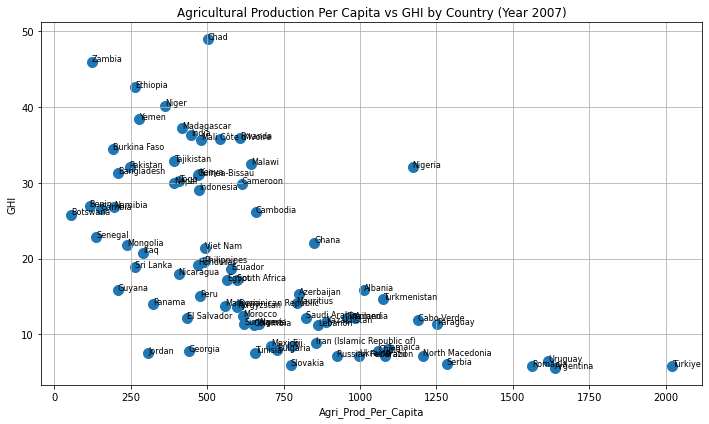

In [12]:
# Data Visualization
# Create a scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(hunger_index_data['Agri_Prod_Per_Capita'], hunger_index_data['GHI'], marker='o', s=100)

plt.xlabel('Agri_Prod_Per_Capita')
plt.ylabel('GHI')
plt.title('Agricultural Production Per Capita vs GHI by Country (Year 2007)')

# Add country labels
for i, row in hunger_index_data.iterrows():
    plt.annotate(row['Country'], (row['Agri_Prod_Per_Capita'], row['GHI']), fontsize=8)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

I will take those countries where Gross Prod Per Capita is less and GHI is high and compare with those countries where Gross Prod Per Capita is high. Analyze the underlying factors for these countries.

In [13]:
low_gross_prod_capita = hunger_index_data['Agri_Prod_Per_Capita'] < 500
high_ghi = hunger_index_data['GHI'] > 25
countries_of_interest = hunger_index_data[low_gross_prod_capita & high_ghi]
country_names = countries_of_interest['Country'].tolist()
print(country_names)

['Zambia', 'Ethiopia', 'Niger', 'Yemen', 'Madagascar', 'India', 'Mali', 'Burkina Faso', 'Tajikistan', 'Pakistan', 'Bangladesh', 'Kenya', 'Guinea-Bissau', 'Togo', 'Nepal', 'Indonesia', 'Benin', 'Namibia', 'Gambia', 'Botswana']



Ethiopia: Ethiopia has a large rural population and significant agricultural potential. Improving infrastructure and farming techniques can enhance agricultural production.

India: India is an agricultural powerhouse but faces issues like land fragmentation and water scarcity. Sustainable practices and technology adoption could boost production.

Kenya: Kenya has a growing agricultural sector, and investments in modern farming techniques and infrastructure can increase productivity.

Indonesia: Indonesia is an archipelago with diverse crops. Focused efforts on sustainable farming and addressing climate-related challenges can enhance production.

Bangladesh: Bangladesh has a dense population, and sustainable farming methods and access to technology can lead to increased agricultural output.

These countries offer a mix of agricultural systems, challenges, and potential solutions, making them suitable for an in-depth study on agricultural production.

[Ethiopia, India, Kenya, Indonesia, Bangladesh]
